# Differential Analysis of CTRL vs rC random (rep1) runs
Here several plots are produces to visulize better aligment profile is search for noise into data when comparing rC (conc. from 400 to 800) with the ctrl dNTPs only control run (replicate 1). 
Here the region analyzed is a **WHOLE CONSTRUCT REGION**.

In [1]:
# import basic modules
import os, glob, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pysam
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# define utils function
def get_complement(seq):
    dict_ = {"A":"T", "T":"A", "G":"C", "C":"G"}
    complement = [dict_[base] for base in seq]
    return complement

## CTRL vs rC_random_400, 600 800 (rep1)


#########################
Differential Analysis of CTRL_1 vs rC_random400_1
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.rC_random400_1.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.rC_random400_1.rev.tsv
Assessing same positions on forw and rev (array([ True]), array([525]))
Some checks...
Forw mean:
 T      0.000064
C      0.000344
G      0.001705
A     -0.001665
del   -0.000338
ins   -0.000111
dtype: float64
Rev mean:
 A     -0.002368
G      0.001650
C      0.000248
T     

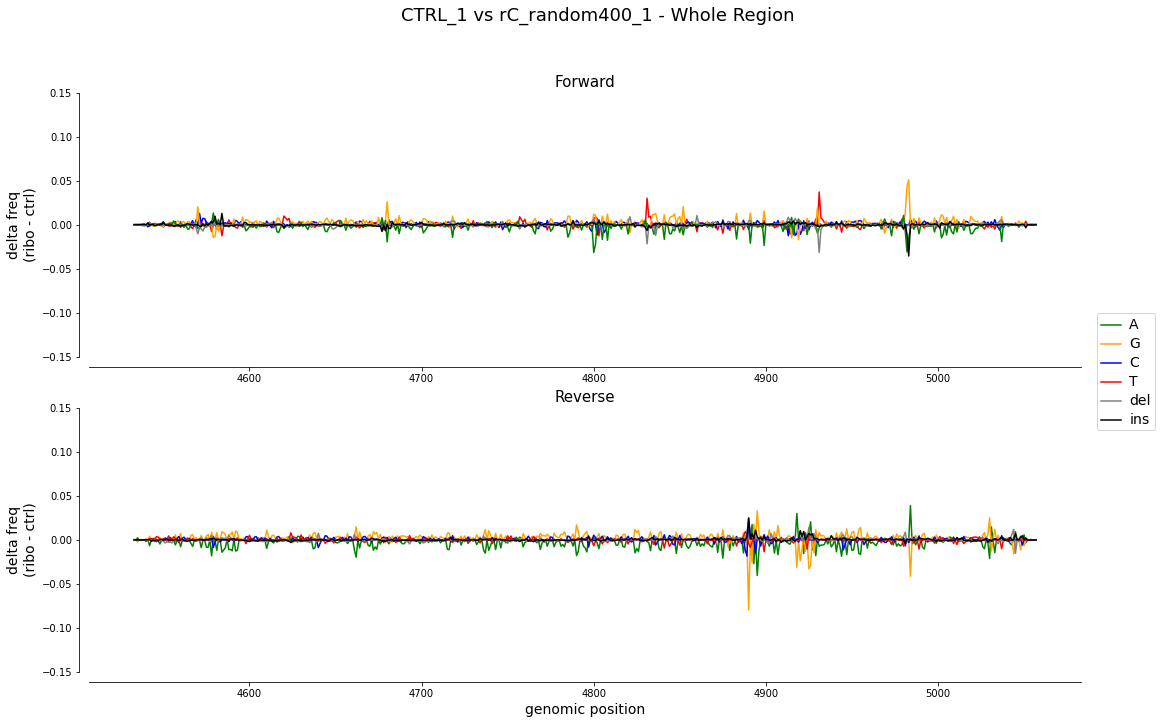


#########################
Differential Analysis of CTRL_1 vs rC_random600_1
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.rC_random600_1.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.rC_random600_1.rev.tsv
Assessing same positions on forw and rev (array([ True]), array([525]))
Some checks...
Forw mean:
 T      0.000356
C     -0.000125
G      0.001311
A     -0.001688
del    0.000008
ins    0.000139
dtype: float64
Rev mean:
 A     -0.002023
G      0.001191
C     -0.000045
T     

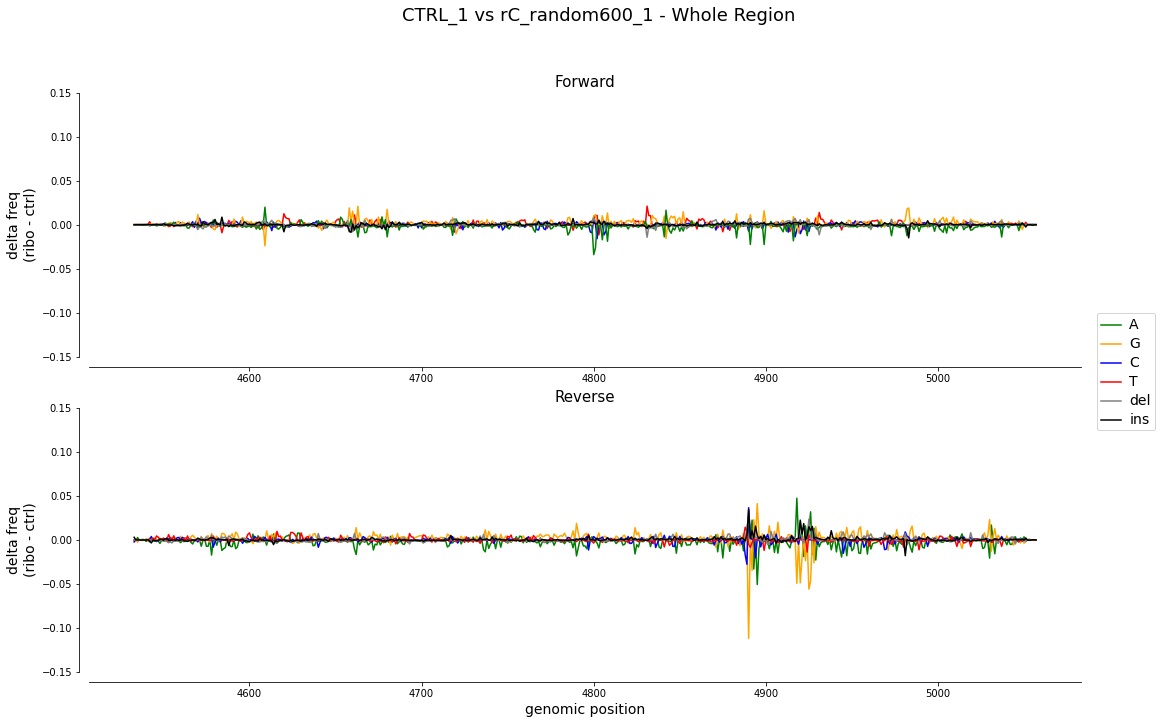


#########################
Differential Analysis of CTRL_1 vs rC_random800_1
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.rC_random800_1.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.rC_random800_1.rev.tsv
Assessing same positions on forw and rev (array([ True]), array([525]))
Some checks...
Forw mean:
 T     -0.001002
C      0.000776
G      0.001165
A     -0.002108
del    0.000643
ins    0.000527
dtype: float64
Rev mean:
 A     -0.003572
G      0.002655
C      0.000362
T     

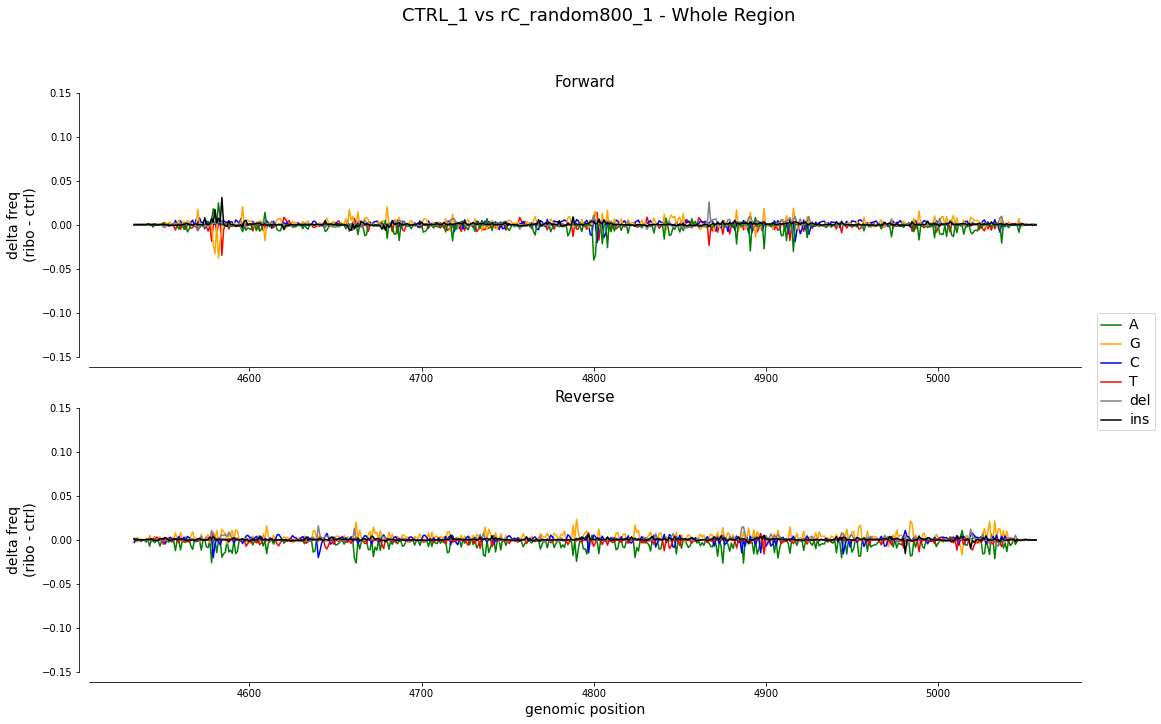

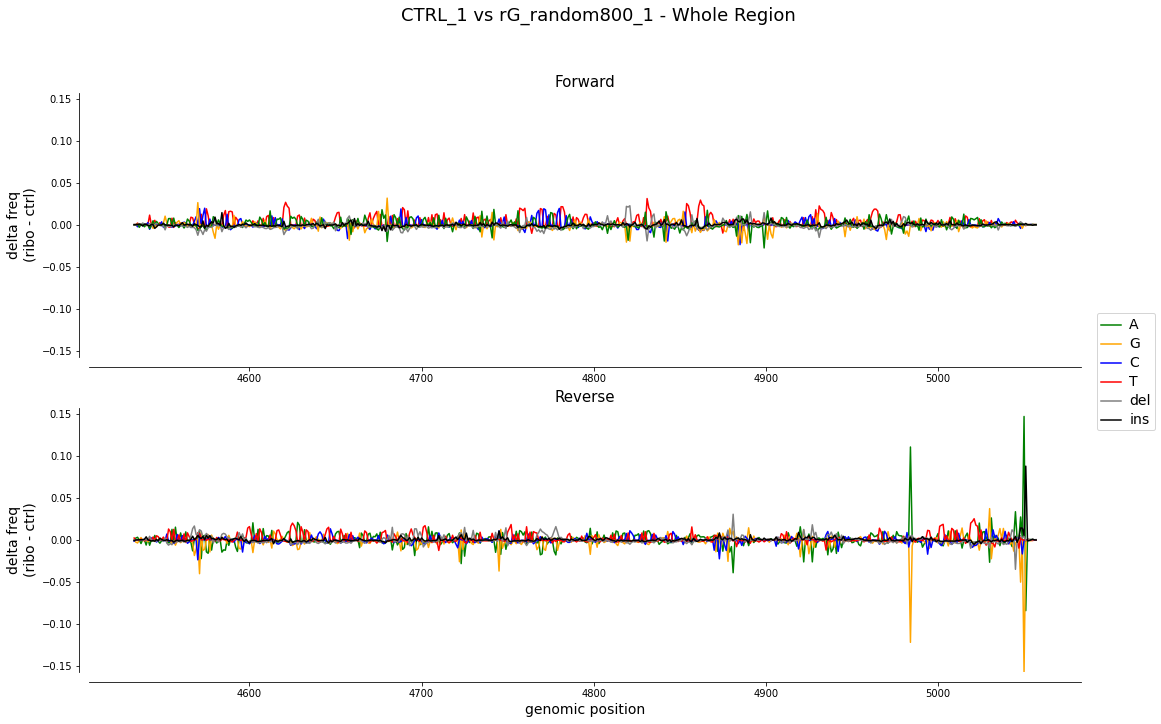


#########################
Differential Analysis of CTRL_1 vs CTRL_2
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_2.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_2.rev.tsv
Assessing same positions on forw and rev (array([ True]), array([525]))
Some checks...
Forw mean:
 T      0.000549
C      0.000328
G      0.000532
A      0.000217
del   -0.000903
ins   -0.000722
dtype: float64
Rev mean:
 A      0.000611
G      0.000386
C      0.000431
T      0.000341
del   -0.000969
ins   -0.000800
dtype: float64

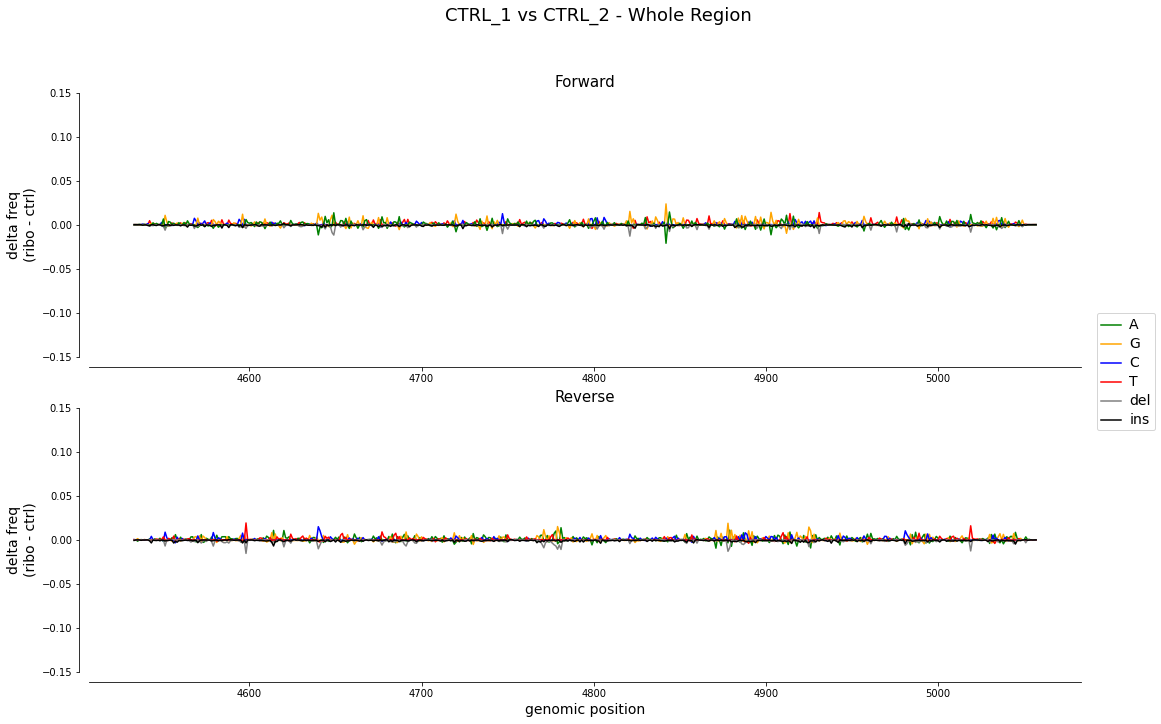

In [3]:
#for r_s in [f"rC_random{i}_1" for i in [400]]:
for r_s in [f"rC_random{i}_1" for i in [400,600,800]] + ["CTRL_2"]:
    # open reference with pysam as FastaFile object
    ref = pysam.FastaFile(reference_filepath)

    # define inputs tsv tables with alignment profiles and basecalling features
    dna_sample_name="CTRL_1"
    ribo_sample_name=r_s
    
    print(f"\n#########################\nDifferential Analysis of {dna_sample_name} vs {ribo_sample_name}")
    
    # define expected sites with ribonucleotides insertion on reverse strand
    sites = []
    
    # define ribo names
    ribos = []
    
    # define color code
    color_code = {"A":"green", "G":"orange", "C":"blue", "T":"red", "rA":"green", "rG":"orange", "rC":"blue", "U":"red", "ins":"black", "del":"gray"}
    
    # load alignment profiles for dna and ribo for each expected "ribo" site
    columns_forw = ['T_count', 'C_count', 'G_count', 'A_count', 'del_count', 'ins_count', 'T', 'C', 'G', 'A', 'del', 'ins']
    columns_rev = ['T_count', 'C_count', 'G_count', 'A_count', 'del_count', 'ins_count', 'A', 'G', 'C', 'T', 'del', 'ins']
    
    results_basename=f"{dna_sample_name} vs {ribo_sample_name} - Whole Region"

    dna_forw_filepath = os.path.join(results_folder, f"{results_basename}.{dna_sample_name}.forw.tsv")
    dna_rev_filepath = os.path.join(results_folder, f"{results_basename}.{dna_sample_name}.rev.tsv")
    ribo_forw_filepath = os.path.join(results_folder, f"{results_basename}.{ribo_sample_name}.forw.tsv")
    ribo_rev_filepath = os.path.join(results_folder, f"{results_basename}.{ribo_sample_name}.rev.tsv")

    print("DNA (+) filepath:", dna_forw_filepath)
    print("DNA (-) filepath:", dna_rev_filepath)
    print("RIBO (+) filepath:", ribo_forw_filepath)
    print("RIBO (-) filepath:", ribo_rev_filepath)
    
    dna_forw = pd.read_table(dna_forw_filepath, index_col=0)
    dna_forw.columns = columns_forw
    dna_rev = pd.read_table(dna_rev_filepath, index_col=0)
    dna_rev.columns = columns_rev
    ribo_forw = pd.read_table(ribo_forw_filepath, index_col=0)
    ribo_forw.columns = columns_forw
    ribo_rev = pd.read_table(ribo_rev_filepath, index_col=0)
    ribo_rev.columns = columns_rev
    
    # calculate differential frequencies between dna_only and ribo runs at each strand
    forw_freqs_diffs = (ribo_forw.iloc[:,-6:] - dna_forw.iloc[:,-6:])
    rev_freqs_diffs = (ribo_rev.iloc[:,-6:] - dna_rev.iloc[:,-6:])

    # assess same positions
    print("Assessing same positions on forw and rev", np.unique(forw_freqs_diffs.index == rev_freqs_diffs.index, return_counts=True))
    
    # retrieve reference sequences
    start, stop = forw_freqs_diffs.index.min()-1, forw_freqs_diffs.index.max()
    seq = ref.fetch("M13mp18", start, stop)
    seq_rev_compl = get_complement(seq)
    
    # convert to lists
    seq = list(seq)
    seq_rev_compl = list(seq_rev_compl)
    
    # take maximum absolute values of differences in both strand to be used to determine y intervals into plots
    # to note: poss columns have to be excluded
    max_abs_freq  = max(forw_freqs_diffs.abs().max().max(), rev_freqs_diffs.abs().max().max())
    if max_abs_freq < 0.15:
        max_abs_freq = 0.15

    # some cheks
    print("Some checks...")
    print("Forw mean:\n", forw_freqs_diffs.mean())
    print("Rev mean:\n", rev_freqs_diffs.mean())

    ### plot differential alignment profiles
    # create a subplot for each site
    f, axes = plt.subplots(2, figsize=(15,9), constrained_layout=True)
    
    # plot forward strand (FORWARD)
    # change index labels
    print(forw_freqs_diffs.sum(axis=1))
    forw_freqs_diffs.plot(ax=axes[0], color=[color_code[i] for i in forw_freqs_diffs.columns])
    axes[0].set_title("Forward", fontdict={'fontsize':15})
    axes[0].set_ylim([-max_abs_freq, max_abs_freq])
    axes[0].legend().set_visible(False)
    # Move left and bottom spines outward by 10 points
    axes[0].spines.left.set_position(('outward', 10))
    axes[0].spines.bottom.set_position(('outward', 10))
    # Hide the right and top spines
    axes[0].spines.right.set_visible(False)
    axes[0].spines.top.set_visible(False)
    # Only show ticks on the left and bottom spines
    axes[0].yaxis.set_ticks_position('left')
    axes[0].xaxis.set_ticks_position('bottom')
    axes[0].set_ylabel("delta freq\n(ribo - ctrl)", fontdict={'fontsize':14})
    
    # plot reverse strand (REVERSE)
    # plot
    print(rev_freqs_diffs.sum(axis=1))
    rev_freqs_diffs.plot(ax=axes[1], color=[color_code[i] for i in rev_freqs_diffs.columns])
    axes[1].set_title("Reverse", fontdict={'fontsize':15})
    axes[1].set_ylim([-max_abs_freq, max_abs_freq])
    axes[1].legend().set_visible(False)
    # Move left and bottom spines outward by 10 points
    axes[1].spines.left.set_position(('outward', 10))
    axes[1].spines.bottom.set_position(('outward', 10))
    # Hide the right and top spines
    axes[1].spines.right.set_visible(False)
    axes[1].spines.top.set_visible(False)
    # Only show ticks on the left and bottom spines
    axes[1].yaxis.set_ticks_position('left')
    axes[1].xaxis.set_ticks_position('bottom')
    axes[1].set_xlabel("genomic position", fontdict={'fontsize':14})
    axes[1].set_ylabel("delta freq\n(ribo - ctrl)", fontdict={'fontsize':14})
    
    # set suptitle and legend position
    f.suptitle(f"{results_basename}", x=0.55, y=1.1, fontsize=18)
    
    # change legend labels and colors
    handles, labels = axes[1].get_legend_handles_labels()
    l = f.legend(handles, labels, bbox_to_anchor=(1.07, 0.635))
    for text, col in zip(l.get_texts(), l.legendHandles):
        col.set_color(color_code[text.get_text()])
        text.set_fontsize(14)
    
    # save image to disk
    save_path = os.path.join(results_folder_diff_plots, f"LINEPLOT_DIFF_{results_basename}.tiff")
    print(f"Saving figure to: {save_path}")
    plt.savefig(save_path, 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    
    # plot resulting image
    plt.show()
    
    # close reference file
    ref.close()

### Total Error for rC_random (400,600,800 and vs inner control rep.2)


#########################
 Total Error analysis of CTRL_1 vs CTRL_2
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_2.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs CTRL_2 - Whole Region.CTRL_2.rev.tsv
Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/diff_plots/TOTAL_ERROR_CTRL_1 vs CTRL_2 - Whole Region.whole.tiff


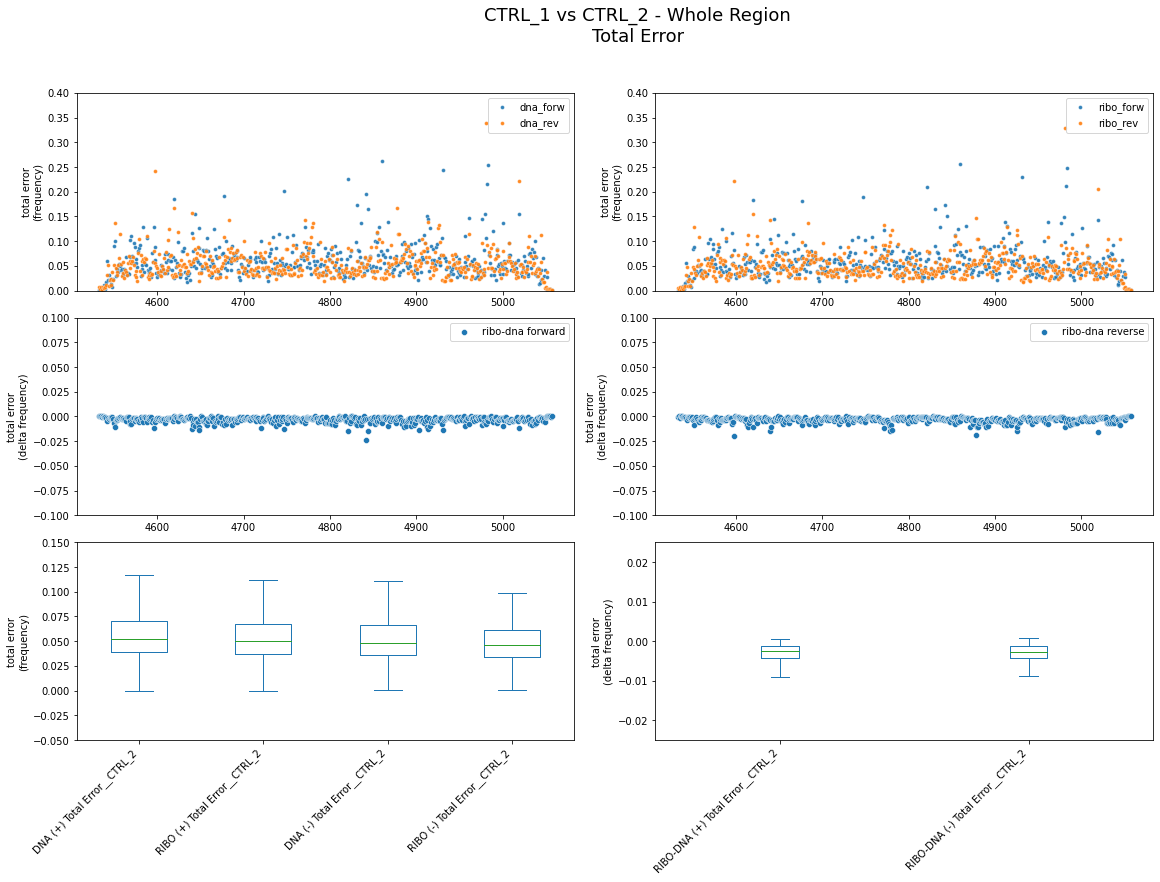


#########################
 Total Error analysis of CTRL_1 vs rC_random400_1
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.rC_random400_1.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random400_1 - Whole Region.rC_random400_1.rev.tsv
Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/diff_plots/TOTAL_ERROR_CTRL_1 vs rC_random400_1 - Whole Region.whole.tiff


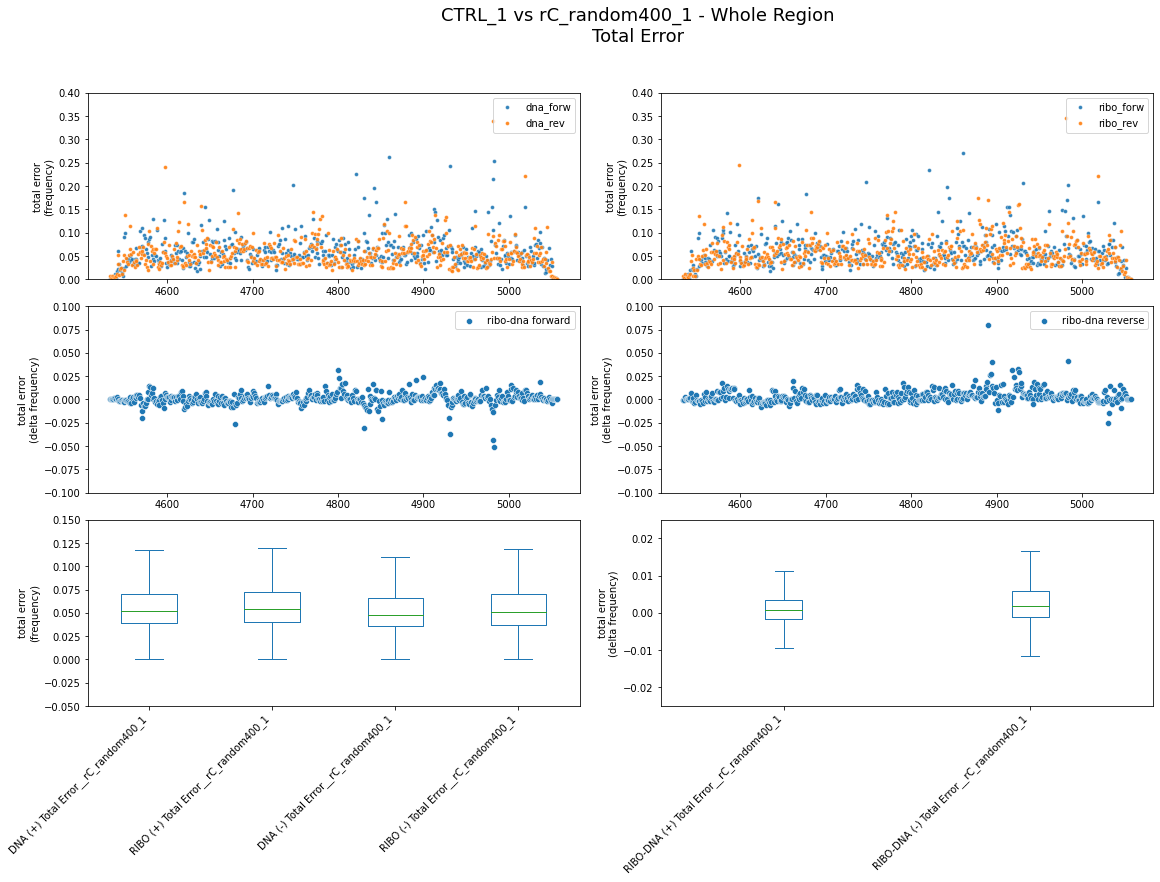


#########################
 Total Error analysis of CTRL_1 vs rC_random600_1
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.rC_random600_1.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random600_1 - Whole Region.rC_random600_1.rev.tsv
Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/diff_plots/TOTAL_ERROR_CTRL_1 vs rC_random600_1 - Whole Region.whole.tiff


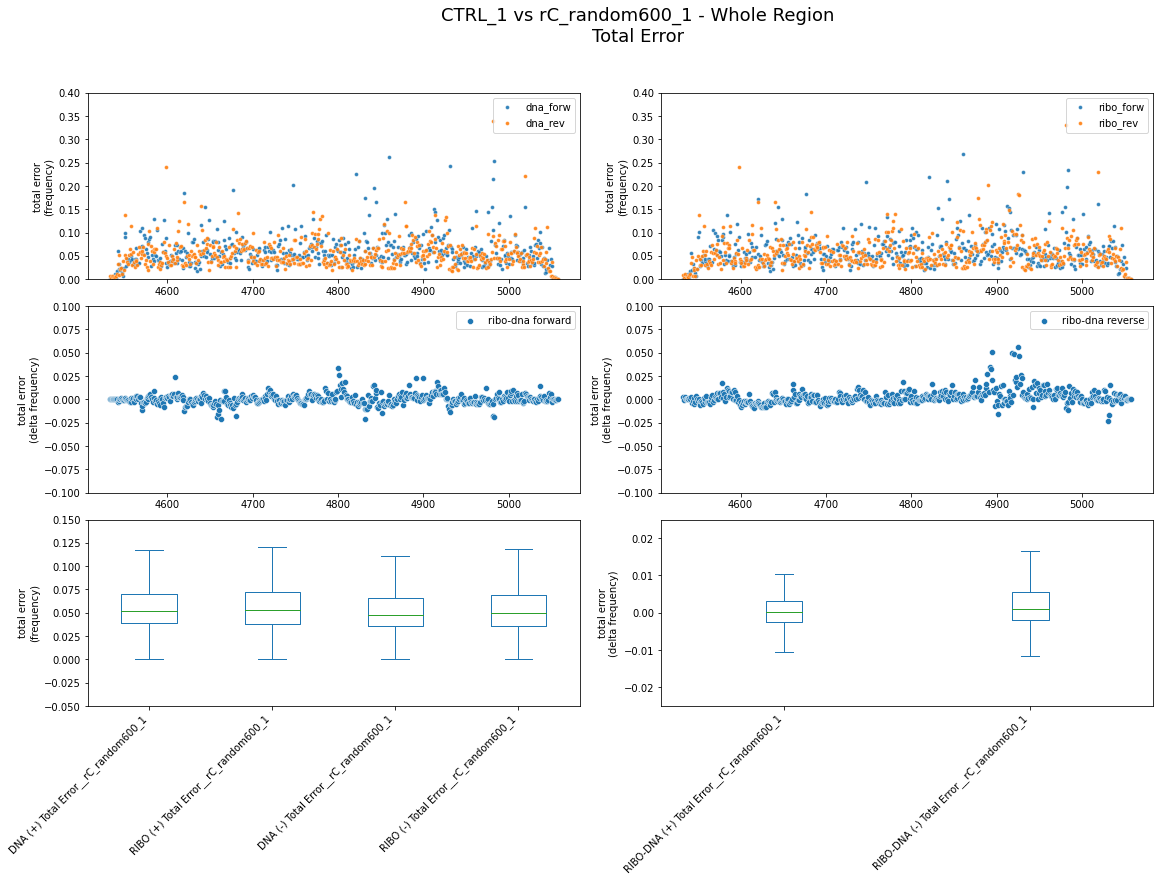


#########################
 Total Error analysis of CTRL_1 vs rC_random800_1
DNA (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.CTRL_1.forw.tsv
DNA (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.CTRL_1.rev.tsv
RIBO (+) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.rC_random800_1.forw.tsv
RIBO (-) filepath: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/CTRL_1 vs rC_random800_1 - Whole Region.rC_random800_1.rev.tsv
Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/basecalling_features_with_raw_data/diff_plots/TOTAL_ERROR_CTRL_1 vs rC_random800_1 - Whole Region.whole.tiff


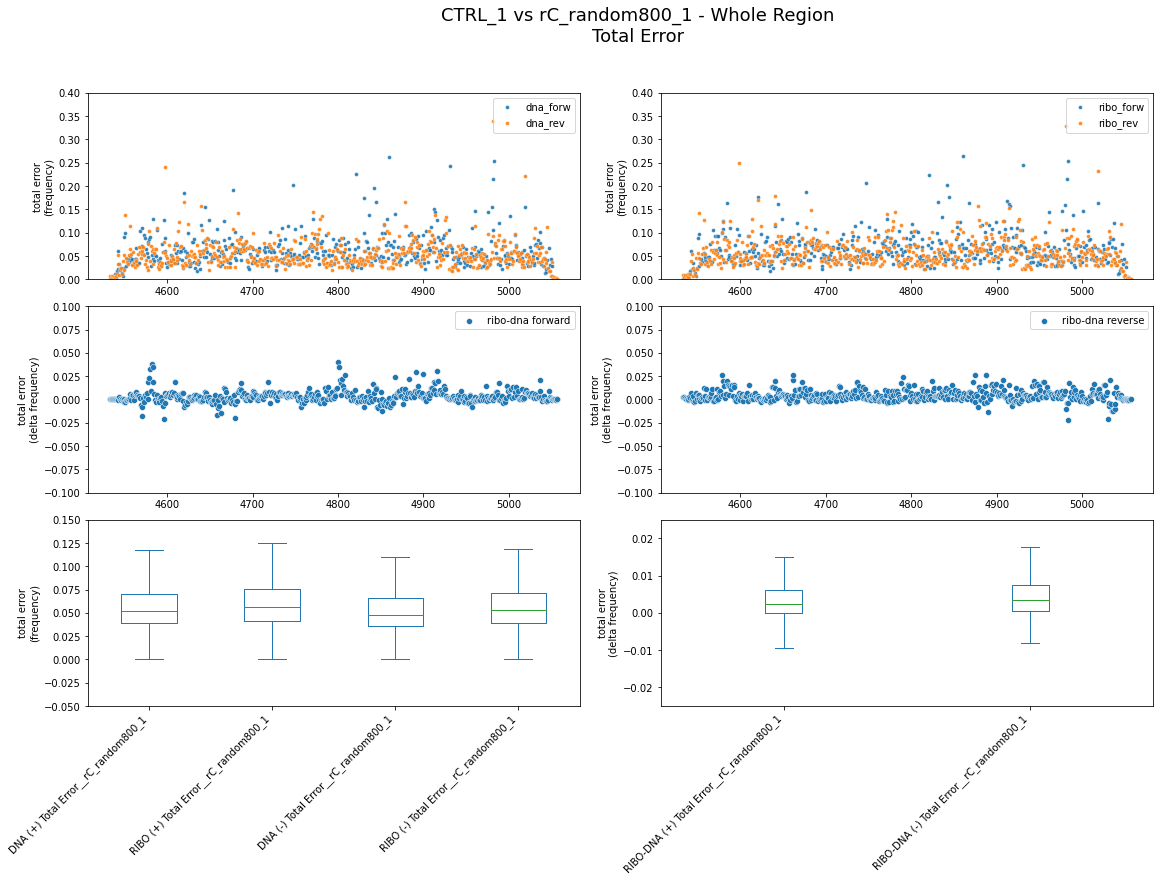


     position  total_error                sample       condition
0        4533     0.000109   DNA (+) Total Error          CTRL_2
1        4534     0.000169   DNA (+) Total Error          CTRL_2
2        4535     0.001459   DNA (+) Total Error          CTRL_2
3        4536     0.003950   DNA (+) Total Error          CTRL_2
4        4537     0.001599   DNA (+) Total Error          CTRL_2
..        ...          ...                   ...             ...
520      5053     0.003135  RIBO (-) Total Error  rC_random800_1
521      5054     0.002527  RIBO (-) Total Error  rC_random800_1
522      5055     0.002215  RIBO (-) Total Error  rC_random800_1
523      5056     0.000275  RIBO (-) Total Error  rC_random800_1
524      5057     0.000253  RIBO (-) Total Error  rC_random800_1

[8400 rows x 4 columns]
     position  total_error                    sample       condition
0        4533    -0.000013  RIBO-DNA (+) Total Error          CTRL_2
1        4534    -0.000020  RIBO-DNA (+) Total Error    

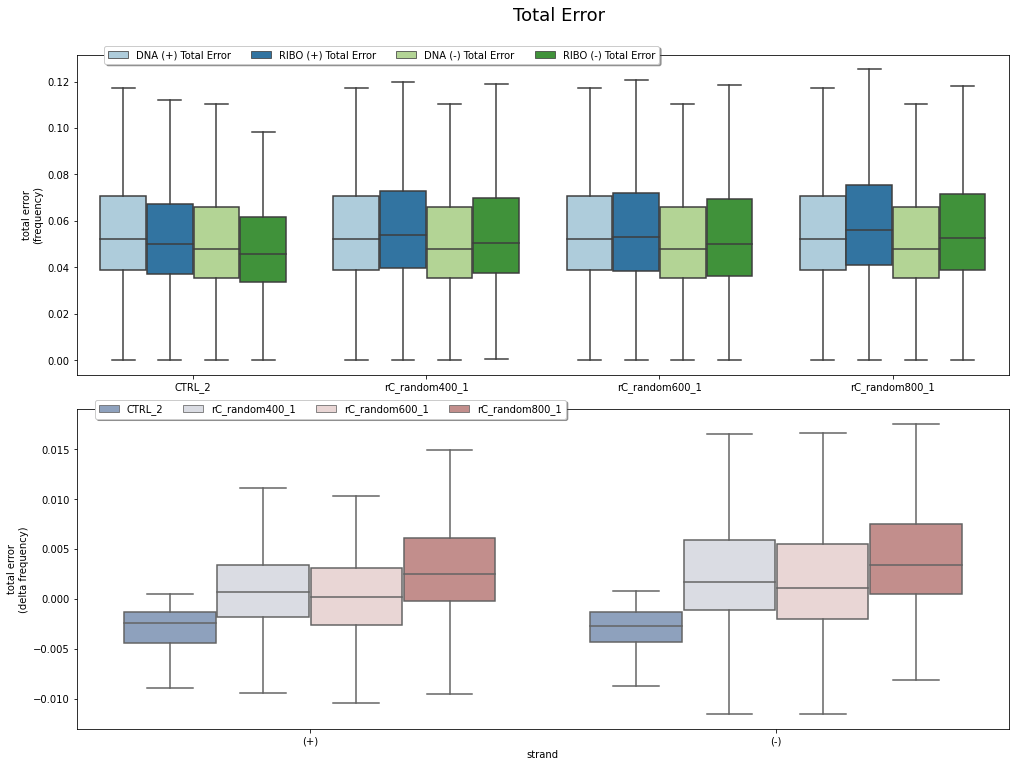

In [4]:
def compute_total_error(df_strand):
    total_errors = []
    for s in df_strand.index:
        error_feats = ["A", "C", "G", "T", "del", "ins"]
        s = df_strand.loc[s]
        expected_base = s.seq
        error_feats.remove(expected_base)
        total_error = s[error_feats].sum()
        total_errors.append(total_error)
    df_strand["total_error"] = total_errors
    return df_strand

# computations ....
stats_concat = []
stats_diffs_concat = []
for r_s in ["CTRL_2"] + [f"rC_random{i}_1" for i in [400,600,800]]:
    # open reference with pysam as FastaFile object
    ref = pysam.FastaFile(reference_filepath)

    # define inputs tsv tables with alignment profiles and basecalling features
    dna_sample_name="CTRL_1"
    ribo_sample_name=r_s
    
    print(f"\n#########################\n Total Error analysis of {dna_sample_name} vs {ribo_sample_name}")

    # define expected sites with ribonucleotides insertion on reverse strand
    sites = []
    
    # define ribo names
    ribos = []

    # define color code
    color_code = {"A":"green", "G":"orange", "C":"blue", "T":"red", "rA":"green", "rG":"orange", "rC":"blue", "U":"red", "ins":"black", "del":"gray"}

    # load alignment profiles for dna and ribo for each expected "ribo" site
    columns_forw = ['T_count', 'C_count', 'G_count', 'A_count', 'del_count', 'ins_count', 'T', 'C', 'G', 'A', 'del', 'ins']
    columns_rev = ['T_count', 'C_count', 'G_count', 'A_count', 'del_count', 'ins_count', 'A', 'G', 'C', 'T', 'del', 'ins']

    results_basename=f"{dna_sample_name} vs {ribo_sample_name} - Whole Region"

    dna_forw_filepath = os.path.join(results_folder, f"{results_basename}.{dna_sample_name}.forw.tsv")
    dna_rev_filepath = os.path.join(results_folder, f"{results_basename}.{dna_sample_name}.rev.tsv")
    ribo_forw_filepath = os.path.join(results_folder, f"{results_basename}.{ribo_sample_name}.forw.tsv")
    ribo_rev_filepath = os.path.join(results_folder, f"{results_basename}.{ribo_sample_name}.rev.tsv")

    print("DNA (+) filepath:", dna_forw_filepath)
    print("DNA (-) filepath:", dna_rev_filepath)
    print("RIBO (+) filepath:", ribo_forw_filepath)
    print("RIBO (-) filepath:", ribo_rev_filepath)
    
    dna_forw = pd.read_table(dna_forw_filepath, index_col=0)
    dna_forw.columns = columns_forw
    dna_rev = pd.read_table(dna_rev_filepath, index_col=0)
    dna_rev.columns = columns_rev
    ribo_forw = pd.read_table(ribo_forw_filepath, index_col=0)
    ribo_forw.columns = columns_forw
    ribo_rev = pd.read_table(ribo_rev_filepath, index_col=0)
    ribo_rev.columns = columns_rev

    # retrieve reference sequences
    start, stop = dna_forw.index.min()-1, dna_forw.index.max()
    seq = ref.fetch("M13mp18", start, stop)
    seq_rev_compl = get_complement(seq)

    # append reference seq
    dna_forw["seq"] = list(seq)
    dna_rev["seq"] = list(seq_rev_compl)
    ribo_forw["seq"] = list(seq)
    ribo_rev["seq"] = list(seq_rev_compl)
    
    # calculate total error
    dna_forw = compute_total_error(dna_forw)
    dna_rev = compute_total_error(dna_rev)
    ribo_forw = compute_total_error(ribo_forw)
    ribo_rev = compute_total_error(ribo_rev)

    # compute diffs
    diffs_forw = ribo_forw["total_error"]-dna_forw["total_error"]
    diffs_rev = ribo_rev["total_error"]-dna_rev["total_error"]

    # aggregate and print some statistics
    stats_names = []
    stats = []

    stats_diffs_names = []
    stats_diffs = []
    
    stats_names.append(f"DNA (+) Total Error__{r_s}")
    stats.append(dna_forw.total_error.to_frame())
    stats_names.append(f"RIBO (+) Total Error__{r_s}")
    stats.append(ribo_forw.total_error.to_frame())
    stats_names.append(f"DNA (-) Total Error__{r_s}")
    stats.append(dna_rev.total_error.to_frame())
    stats_names.append(f"RIBO (-) Total Error__{r_s}")
    stats.append(ribo_rev.total_error.to_frame())
    stats = pd.concat(stats, axis=1)
    stats.columns = stats_names

    stats_diffs_names.append(f"RIBO-DNA (+) Total Error__{r_s}")
    stats_diffs.append(diffs_forw.to_frame())
    stats_diffs_names.append(f"RIBO-DNA (-) Total Error__{r_s}")
    stats_diffs.append(diffs_rev.to_frame())
    stats_diffs = pd.concat(stats_diffs, axis=1)
    stats_diffs.columns = stats_diffs_names

    # concat to plot
    for s in stats.columns:
        #print(s)
        s_ = stats[s].reset_index()
        s_["sample"] = s.split("__")[0]
        s_["condition"] = s.split("__")[1]
        s_.columns = ["position", "total_error", "sample", "condition"]
        stats_concat.append(s_)
    
    for s in stats_diffs.columns:
        #print(s)
        s_ = stats_diffs[s].reset_index()
        s_["sample"] = s.split("__")[0]
        s_["condition"] = s.split("__")[1]
        s_.columns = ["position", "total_error", "sample", "condition"]
        stats_diffs_concat.append(s_)

    # plot
    # create a subplot for each site
    f, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,11), constrained_layout=True)

    sn.scatterplot(data=dna_forw, x=dna_forw.index, y="total_error", alpha=0.9, label="dna_forw", s=15, ax=axes[0,0])
    sn.scatterplot(data=dna_rev, x=dna_rev.index, y="total_error", alpha=0.9, label="dna_rev", s=15, ax=axes[0,0])
    axes[0,0].set_ylabel("total error\n(frequency)")
    sn.scatterplot(data=ribo_forw, x=ribo_forw.index, y="total_error", alpha=0.9, label="ribo_forw", s=15, ax=axes[0,1])
    sn.scatterplot(data=ribo_rev, x=ribo_rev.index, y="total_error", alpha=0.9, label="ribo_rev", s=15, ax=axes[0,1])
    axes[0,1].set_ylabel("total error\n(frequency)")
    # set ylims
    axes[0,0].set_ylim(0,0.4)
    axes[0,1].set_ylim(0,0.4)

    sn.scatterplot(data=diffs_forw.to_frame(),x=diffs_forw.to_frame().index, y=diffs_forw.to_frame()["total_error"], label="ribo-dna forward", ax=axes[1,0])
    axes[1,0].set_ylabel("total error\n(delta frequency)")
    sn.scatterplot(data=diffs_rev.to_frame(),x=diffs_rev.to_frame().index, y=diffs_rev.to_frame()["total_error"], label="ribo-dna reverse", ax=axes[1,1])
    axes[1,1].set_ylabel("total error\n(delta frequency)")
    # set ylims
    axes[1,0].set_ylim(-0.1,0.1)
    axes[1,1].set_ylim(-0.1,0.1)
    
    stats.plot(kind="box", ax=axes[2,0], showfliers=False)
    axes[2,0].set_xticks(axes[2,0].get_xticks(), axes[2,0].get_xticklabels(), rotation=45, ha='right')
    axes[2,0].set_ylabel("total error\n(frequency)")
    stats_diffs.plot(kind="box", ax=axes[2,1], showfliers=False)
    axes[2,1].set_xticks(axes[2,1].get_xticks(), axes[2,1].get_xticklabels(), rotation=45, ha='right')
    axes[2,1].set_ylabel("total error\n(delta frequency)")
    # set ylims
    axes[2,0].set_ylim(-0.05,0.15)
    axes[2,1].set_ylim(-0.025,0.025)
    
    f.suptitle(f"{results_basename}\nTotal Error", x=0.55, y=1.1, fontsize=18)

    # save image to disk
    save_path = os.path.join(results_folder_diff_plots, f"TOTAL_ERROR_{results_basename}.whole.tiff")
    print(f"Saving figure to: {save_path}")
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

    plt.show()
    
    # close reference file
    ref.close()

### create stats dataframes
print()
stats_concat = pd.concat(stats_concat)
print(stats_concat)
stats_diffs_concat = pd.concat(stats_diffs_concat)
print(stats_diffs_concat)

# save on disk stats_concat and stats_diffs_concat
print("Aggregating Statistics of total error end its deltas between pairs:")
save_path = os.path.join(results_folder_diff_plots, f"TOTAL_ERROR_GLOBAL_rC_random_1.whole.tsv")
print("Saving on disk stats_concat as:", save_path)
stats_concat.to_csv(save_path, sep="\t", index=False)

save_path = os.path.join(results_folder_diff_plots, f"TOTAL_ERROR_DIFFS_GLOBAL_rC_random_1.whole.tsv")
print("Saving on disk stats_diffs_concat as:", save_path)
stats_diffs_concat.to_csv(save_path, sep="\t", index=False)

# plot stats
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,10), constrained_layout=True)
sn.boxplot(data=stats_concat, x="condition", y="total_error", hue="sample", showfliers=False, ax=axes[0], palette="Paired")
axes[0].legend(loc='right', bbox_to_anchor=(0.63, 1.0), ncol=4, fancybox=True, shadow=True)
axes[0].set_xlabel("")
axes[0].set_ylabel("total error\n(frequency)")
sn.boxplot(data=stats_diffs_concat, x="sample", y="total_error", hue="condition", showfliers=False, ax=axes[1], palette="vlag")
axes[1].legend(loc='right', bbox_to_anchor=(0.53, 1.0), ncol=4, fancybox=True, shadow=True)
axes[1].set_xlabel("strand")
axes[1].set_ylabel("total error\n(delta frequency)")
axes[1].set_xticklabels(["(+)", "(-)"])
f.suptitle(f"Total Error", x=0.55, y=1.05, fontsize=18)

# save image to disk
save_path = os.path.join(results_folder_diff_plots, f"TOTAL_ERROR_GLOBAL_rC_random_1.whole.tiff")
print(f"Saving figure to: {save_path}")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

In [5]:
stats_diffs_concat.tail()

,position,total_error,sample,condition
520,5053,-0.000619,RIBO-DNA (-) Total Error,rC_random800_1
521,5054,-0.000140,RIBO-DNA (-) Total Error,rC_random800_1
522,5055,-0.000154,RIBO-DNA (-) Total Error,rC_random800_1
523,5056,0.000104,RIBO-DNA (-) Total Error,rC_random800_1
524,5057,0.000025,RIBO-DNA (-) Total Error,rC_random800_1


In [6]:
# perform two-way ANOVA () ---> condition is the comparision between ctrl and the condition, sample is the strand
formula = f'total_error ~  C(condition) + C(sample) + C(condition):C(sample)'
model = sm.ols(formula, data=stats_diffs_concat).fit()
table = anova_lm(model, typ=2)
print(table)

                          sum_sq      df           F         PR(>F)
C(condition)            0.030073     3.0  249.065294  9.889804e-149
C(sample)               0.002128     1.0   52.868240   4.234288e-13
C(condition):C(sample)  0.001037     3.0    8.587220   1.109643e-05
Residual                0.168722  4192.0         NaN            NaN
